<h1>Handling Missing Categorical Data</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('train.csv' , usecols=['GarageQual' , 'FireplaceQu' , 'SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [7]:
df.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

In [8]:
df['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

Text(0.5, 1.0, 'GarageQual')

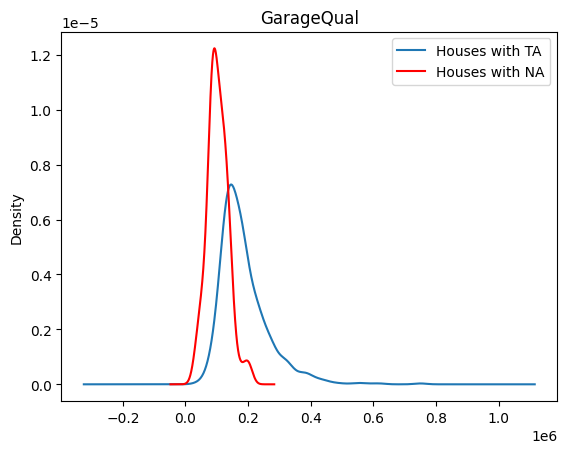

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde' , ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde' , ax = ax , color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Houses with TA' , 'Houses with NA']
ax.legend(lines , labels , loc='best')

plt.title('GarageQual')

In [10]:
temp = df[df['GarageQual'] == 'TA']['SalePrice']

In [11]:
df['GarageQual'].fillna('TA' , inplace=True)

<Axes: xlabel='GarageQual'>

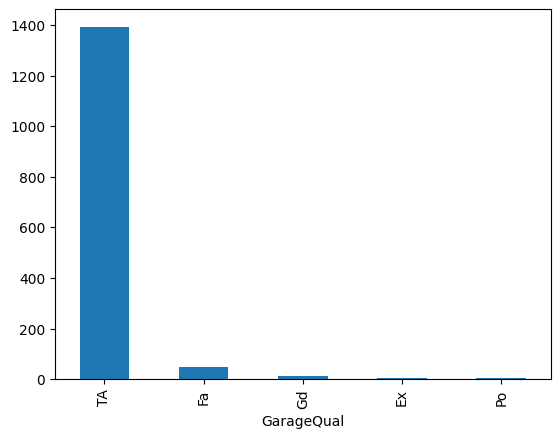

In [14]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

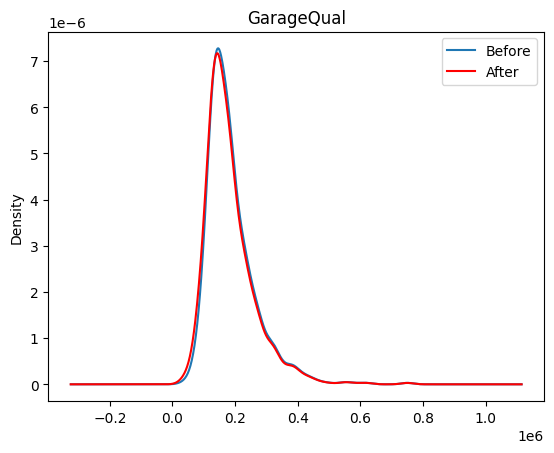

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde' , ax=ax)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde' , ax=ax , color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Before' , 'After']
ax.legend(lines , labels , loc='best')

plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

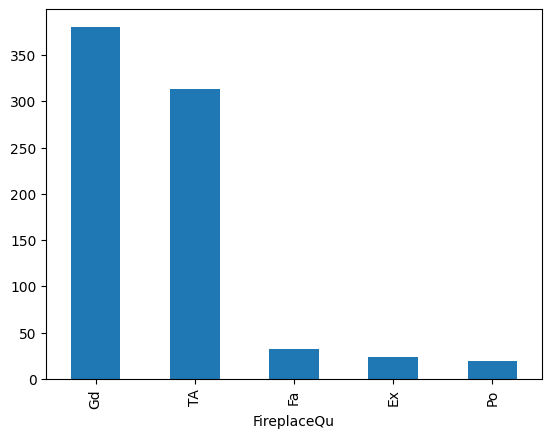

In [17]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [18]:
df['FireplaceQu'].fillna('GD' , inplace=True)

<Axes: xlabel='FireplaceQu'>

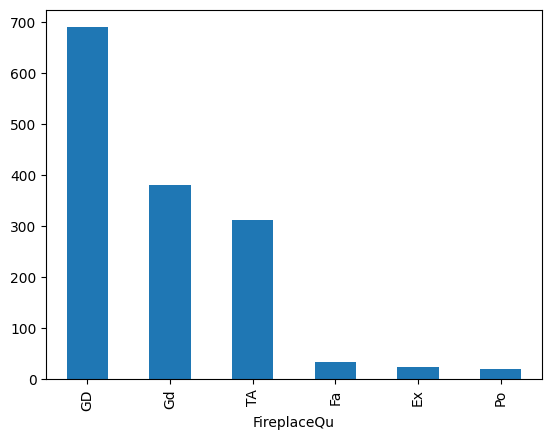

In [19]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [20]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(df.drop(columns=['SalePrice']) , df['SalePrice'] , test_size=0.2 , random_state=2)

In [27]:
Y_test.head()

503     289000
101     178000
608     359100
1089    197000
819     224000
Name: SalePrice, dtype: int64

In [21]:
from sklearn.impute import SimpleImputer

In [28]:
imputer = SimpleImputer(strategy='most_frequent')

In [29]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [30]:
imputer.statistics_

array(['GD', 'TA'], dtype=object)

In [ ]:
# we can also impute a different category ('Missing')
# imputer1 = SimpleImputer(strategy='constant' , fill_value='Missing')